In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.3.4
2.6.3


In [3]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [4]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [5]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
CategoricalParameter('A.1_Brate', [0, 1, 2])
CategoricalParameter('A.2_Brate', [0, 1, 2])
CategoricalParameter('A.3_Brate', [0, 1, 2])
CategoricalParameter('A.4_Brate', [0, 1, 2])
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [6]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

In [7]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2', 'A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'), function=<function sum_over at 0x000001DA0845B0D0>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'), function=<function sum_over at 0x000001DA0845B0D0>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2', 'A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'), function=<function sum_over at 0x000001DA0845B0D0>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths 0', 'A.2_Expected Number of Deaths 1', 'A.2_Expected Number of Deaths 2'), function=<function sum_over at 0

In [8]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with SequentialEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [07:50<00:00,  2.35s/it]
[MainProcess/INFO] experiments finished


In [9]:
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,61,53.993251,10,0.921320,66.855444,10,0.515806,180.285082,10,0.399796,...,8,5,0,5,6,5,3,4,0,dikesnet
1,94,318.872721,1.5,0.166492,206.665320,1.0,0.016991,327.366724,10,0.075910,...,8,5,0,5,6,5,3,5,0,dikesnet
2,77,150.446615,1.5,0.314221,151.746429,1.5,0.817595,274.360625,1.5,0.336600,...,8,5,0,5,6,5,3,6,0,dikesnet
3,33,287.285971,10,0.397268,198.680497,1.0,0.471344,74.850747,10,0.710722,...,8,5,0,5,6,5,3,7,0,dikesnet
4,20,348.563104,1.0,0.075646,141.667667,10,0.372449,236.586881,1.5,0.758902,...,8,5,0,5,6,5,3,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,11,111.814804,10,0.901917,263.520994,1.0,0.927045,314.302252,1.0,0.341778,...,7,9,8,8,3,3,2,49,3,dikesnet
196,113,316.036148,10,0.461041,277.120261,1.5,0.222322,157.419022,10,0.842297,...,7,9,8,8,3,3,2,50,3,dikesnet
197,121,80.415075,1.0,0.788324,130.461469,1.0,0.113665,102.643068,1.0,0.472414,...,7,9,8,8,3,3,2,51,3,dikesnet
198,128,341.646532,1.5,0.990142,209.488202,10,0.352823,32.246765,10,0.428409,...,7,9,8,8,3,3,2,52,3,dikesnet


In [10]:
outcomes

{'A.1 Total Costs': array([1.47485484e+08, 1.47485484e+08, 1.47485484e+08, 1.47485484e+08,
        1.56587701e+08, 1.47485484e+08, 1.47485484e+08, 1.47485484e+08,
        1.47485484e+08, 1.47485484e+08, 1.47485484e+08, 1.47485484e+08,
        1.47485484e+08, 1.47485484e+08, 1.47485484e+08, 1.47485484e+08,
        1.47485484e+08, 1.74184232e+08, 1.47485484e+08, 1.02048110e+09,
        1.47485484e+08, 1.47485484e+08, 1.47485484e+08, 1.47485484e+08,
        1.47485484e+08, 1.47485484e+08, 1.47485484e+08, 1.47485484e+08,
        1.47485484e+08, 1.47485484e+08, 1.47485484e+08, 1.48794278e+08,
        1.47485484e+08, 1.47485484e+08, 1.47485484e+08, 1.47485484e+08,
        1.47485484e+08, 5.41303163e+08, 1.47485484e+08, 1.47485484e+08,
        1.47485484e+08, 1.47485484e+08, 1.47485484e+08, 1.47485484e+08,
        1.47485484e+08, 1.47485484e+08, 1.47485484e+08, 1.47485484e+08,
        1.47485484e+08, 1.47485484e+08, 1.95040666e+08, 1.95040666e+08,
        1.95040666e+08, 1.95040666e+08, 1.950

In [11]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy

policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]

In [12]:
#pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [03:07<00:00,  1.60it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [13]:
print(results)

(     A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                         23  304.954109       1.5   0.485052  262.846264   
1                         58  218.996097       1.0   0.302332  107.131042   
2                        125  175.373495       1.5   0.347646  223.213891   
3                          0  145.180050       1.0   0.226427  182.312830   
4                         79  181.261525       1.5   0.005509  295.075034   
..                       ...         ...       ...        ...         ...   
295                      112  342.616199       1.0   0.556517  184.797703   
296                       46   45.173010       1.0   0.687828   57.231186   
297                       18  340.298146       1.0   0.716408  172.104031   
298                       97  122.723958        10   0.322650  163.095446   
299                        2  311.828583       1.5   0.428117  165.367674   

    A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...    policy  

In [14]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes["A.1 Total Costs"] < 2.5e+08
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 200 points remaining, containing 146 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.705, coverage: 0.9657534246575342, density: 1.0 restricted_dimensions: 2


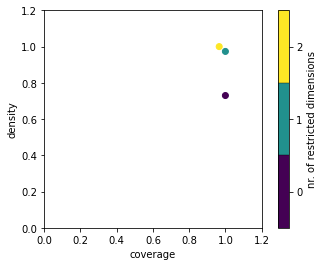

In [15]:
box1.show_tradeoff()
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category


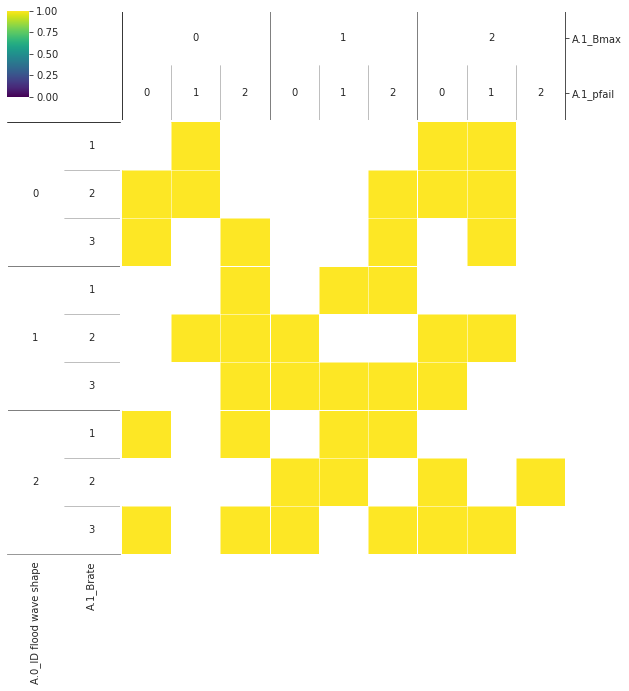

In [16]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes["A.1_Expected Number of Deaths"] < 1
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()